# **Load PhoBert and py_corenlp**

In [ ]:
!pip3 install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.8 MB/s eta 0:00:00


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.8 MB/s eta 0:00:00


In [ ]:
#Load PhoBert and demo on a simple sentence
import torch
from transformers import AutoModel, AutoTokenizer

#Load pretrained model as well as tokenizer
phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

# INPUT TEXT MUST BE ALREADY WORD-SEGMENTED!
sentence = 'Chúng_tôi là những nghiên_cứu_viên .'

input_ids = torch.tensor([tokenizer.encode(sentence)])
print(input_ids.size())
with torch.no_grad():
    features = phobert(input_ids)  # Models outputs are now tuples

## With TensorFlow 2.0+:
# from transformers import TFAutoModel
# phobert = TFAutoModel.from_pretrained("vinai/phobert-base")

Some weights of the model checkpoint at vinai/phobert-base-v2 were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


torch.Size([1, 7])


In [ ]:
features

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 3.8363e-02,  7.0703e-01, -1.3202e-01,  ..., -9.7446e-02,
           2.5193e-01,  3.4828e-01],
         [ 2.1041e-01,  2.3984e-01,  9.1060e-03,  ..., -3.2408e-04,
          -1.7492e-01,  4.0127e-02],
         [ 2.3745e-01,  9.8410e-03, -1.6509e-01,  ..., -4.3378e-02,
          -7.5783e-02,  4.6838e-02],
         ...,
         [ 2.3041e-01,  3.7583e-01,  1.7602e-02,  ...,  7.8472e-02,
           1.8661e-01,  5.2052e-02],
         [-2.3020e-01,  5.0276e-01,  1.0913e-01,  ..., -7.3261e-02,
           1.4339e-01,  1.8320e-01],
         [ 1.8813e-01,  6.2870e-01, -2.4809e-01,  ..., -4.8115e-02,
           1.6404e-01,  4.7204e-01]]]), pooler_output=tensor([[ 1.1309e-01, -1.7953e-01, -4.9548e-03, -3.1473e-01,  9.9101e-02,
         -1.7945e-02,  2.6742e-01,  1.3356e-01,  5.8946e-02,  1.1785e-01,
          4.3233e-03,  1.0967e-01, -1.8572e-01,  6.3673e-02,  1.1697e-01,
         -1.3221e-01,  4.1506e-02,  4.3337e-02, -8.648

In [ ]:
!pip install py_vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.3 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4305 sha256=f39efdcd41e9550ae5677325753d8ed63f644e2a3dcebc8d651dcb03fd6896e5
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [ ]:
!mkdir /content/vncorenlp

In [ ]:
import py_vncorenlp

# Automatically download VnCoreNLP components from the original repository
# and save them in some local machine folder
py_vncorenlp.download_model(save_dir='/content/vncorenlp')

# Load the word and sentence segmentation component
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/vncorenlp')

text = "Ông Nguyễn Khắc Chúc  đang làm việc tại Đại học Quốc gia Hà Nội. Bà Lan, vợ ông Chúc, cũng làm việc tại đây."

output = rdrsegmenter.word_segment(text)

print(output)
# ['Ông Nguyễn_Khắc_Chúc đang làm_việc tại Đại_học Quốc_gia Hà_Nội .', 'Bà Lan , vợ ông Chúc , cũng làm_việc tại đây .']

['Ông Nguyễn_Khắc_Chúc đang làm_việc tại Đại_học Quốc_gia Hà_Nội .', 'Bà Lan , vợ ông Chúc , cũng làm_việc tại đây .']


In [ ]:
#rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/vncorenlp')
#Testing Word Segmentation on different sentence
text = "Trung Tướng Phan Trọng Chinh, Sống Chiến Đấu "

output = rdrsegmenter.word_segment(text)

print(output)

['Trung_Tướng Phan_Trọng_Chinh , Sống Chiến_Đấu']


# **Import libraries and Load data from Classmates**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import re,string,unicodedata
from keras.preprocessing import text, sequence
from keras.utils import pad_sequences
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import joblib
from sklearn import datasets, svm, metrics
from string import punctuation
import keras
import tensorflow as tf
import shutil
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read data from github
url1 = 'https://github.com/koisd/CS114.N21.KHCL'
url2 = 'https://github.com/thivinhhuy/CS114.N21.KHCL'
url3 = 'https://github.com/NguyenMaiChiTan/CS114.N21.KHCL'
url4 = 'https://github.com/Starrick2001/CS114.N21.KHCL'
url5 = 'https://github.com/TuananhSR/CS114.N21.KHCL'
url6 = 'https://github.com/thivinhhuy/CS114.N21.KHCL'
url7 = 'https://github.com/daonamthuan/CS114.N21.KHCL'
url8 = 'https://github.com/leduy-it/CS114.N21.KHCL'
urls = [url1, url2, url3, url4, url6, url7, url8]

In [ ]:
#This cell to load data is inspired from Group 7.
#Thank for the code after all.
df = pd.DataFrame()
# sentences = 0
for url in urls:
    try:
        shutil.rmtree('/content/CS114.N21.KHCL/')
    except:
        pass
    !git clone {url}

    group_folder = os.listdir('/content/CS114.N21.KHCL/sarcasm_detection')[0]

    try:
        data_file = os.listdir(f'/content/CS114.N21.KHCL/sarcasm_detection/{group_folder}')[0]
    except:
        pass

    try:
        temp = pd.read_json(f"/content/CS114.N21.KHCL/sarcasm_detection/{group_folder}/{data_file}", lines=True)
    except:
        temp = pd.read_json(f"/content/CS114.N21.KHCL/sarcasm_detection/{group_folder}", lines=True)
    # sentences += temp.shape[0]
    df = pd.concat([df, temp[['is_sarcastic', 'headline', 'article_link']]])

Cloning into 'CS114.N21.KHCL'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), 2.94 KiB | 2.94 MiB/s, done.
Cloning into 'CS114.N21.KHCL'...
remote: Enumerating objects: 357, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 357 (delta 22), reused 0 (delta 0), pack-reused 287
Receiving objects: 100% (357/357), 440.41 KiB | 4.40 MiB/s, done.
Resolving deltas: 100% (95/95), done.
Cloning into 'CS114.N21.KHCL'...
remote: Enumerating objects: 374, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 374 (delta 12), reused 83 (delta 9), pack-reused 280
Receiving objects: 100% (374/374), 286.08 MiB | 51.52 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Cloning into 'CS114.N21.KHCL'...
remote

In [ ]:
df

,is_sarcastic,headline,article_link
0,1,Băm mọi thứ... cho vào mồm,https://danlambaovn.blogspot.com/2022/09/bam-m...
1,1,"Trung Tướng Phan Trọng Chinh, Sống Chiến Đấu H...",https://danlambaovn.blogspot.com/2022/09/trung...
2,1,Việc thay Nguyễn Phú Trọng vẫn phải chờ đến “p...,https://danlambaovn.blogspot.com/2022/09/viec-...
3,1,Tại sao vết thương vẫn chưa lành?,https://danlambaovn.blogspot.com/2023/02/tai-s...
4,1,"Dùng tranh biếm họa ""rắn ngậm phong bì"" làm lo...",https://danlambaovn.blogspot.com/2022/09/dung-...
...,...,...,...
20186,1,"Lộ ảnh sồ sề khác xa trên mạng, hot girl Đài L...",https://kenh14.vn/lo-anh-so-se-khac-xa-tren-ma...
20187,1,Đôi trai đẹp Sài Gòn nên duyên nhờ một cô gái:...,https://kenh14.vn/doi-trai-dep-sai-gon-nen-duy...
20188,1,Bức ảnh hiếm hoi của NSƯT Kim Tử Long với con ...,https://kenh14.vn/buc-anh-hiem-hoi-cua-nsut-ki...
20189,1,"Tìm thấy ""hung thần"" của hội ghét bếp: Cuộc đờ...",https://kenh14.vn/tim-thay-hung-than-cua-hoi-g...


# **Data Preprocessing, Data Visualization & Word Segmentation**

In [ ]:
#We load Vietnamese stopwords from Github
!git clone 'https://github.com/stopwords/vietnamese-stopwords'
def get_stopwords_list(stop_file_path):
    """load stop words """

    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

stopwords_path = "/content/vietnamese-stopwords/vietnamese-stopwords.txt"
stop = set(get_stopwords_list(stopwords_path))
punctuation = list(string.punctuation)
stop.update(punctuation)

Cloning into 'vietnamese-stopwords'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 95 (delta 3), reused 0 (delta 0), pack-reused 81
Unpacking objects: 100% (95/95), 40.23 KiB | 1.06 MiB/s, done.


In [ ]:
#Remove square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Remove stopwords
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
def denoise_text(text):
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply data preprocessing on headline column
df.headline=df.headline.apply(denoise_text)

In [ ]:
#Data is quite balance
df.is_sarcastic.value_counts()

0    12837
1    11764
Name: is_sarcastic, dtype: int64

In [ ]:
value = df.iloc[0, 1]

In [ ]:
value

'Băm thứ... mồm'

In [ ]:
#Estimate max word length and average word length
#It helps with tensor mapping later
word_len=[]
for i in range(len(df)):
    value = df.iloc[i,1]
    word_len.append(len(value.split(' ')))
print("Max word length of the headlines:",max(word_len))
print("average word length of the headlines:",round(np.mean(word_len)))

Max word length of the headlines: 32
average word length of the headlines: 10


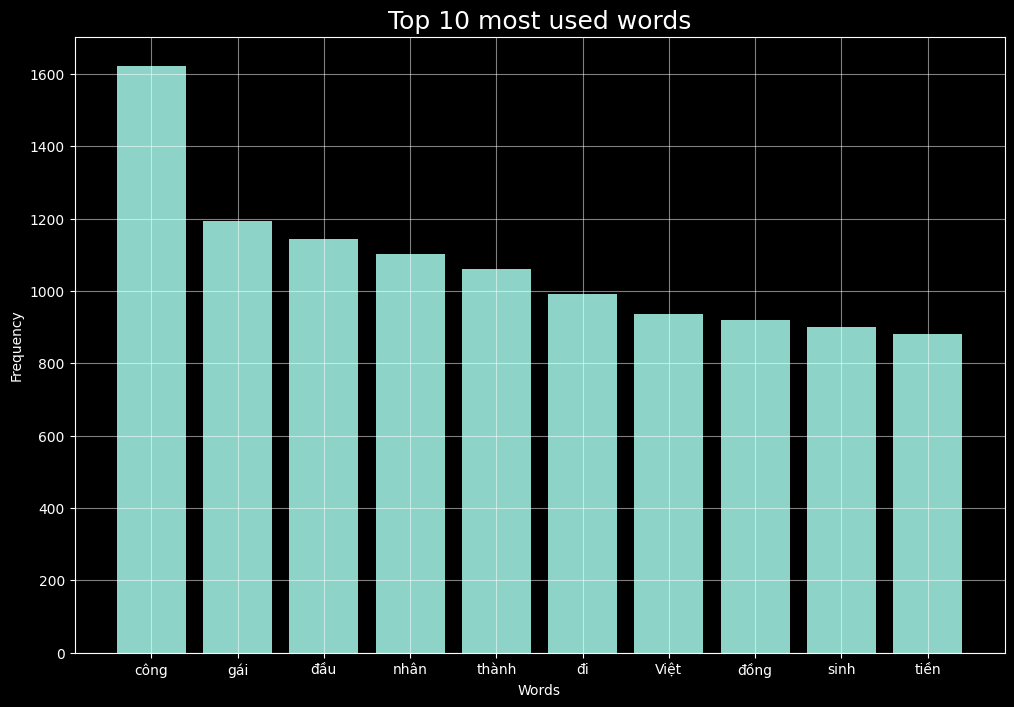

In [ ]:
#Data visualization
import collections
words = []
for text in df['headline']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Dark Background
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')

plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/vncorenlp')
#Apply word segmentation on headline data
new_headline = []
for i in range(len(df)):
    value = (df.iloc[i,1])
    text = str(value)
    text = rdrsegmenter.word_segment(text)
    print(text)
    new_headline.append(str(text))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
['8 bảo_vệ thân hẹn_hò trực_tuyến']
['4 mẫu đàn " sáng_giá " , phụ_nữ kết_hôn hạnh_phúc hơn !']
['Nhật bốc_vác , gái Đồng_Tháp gạt mắt , lột_xác 5']
['gái Hà_Nội nút bàn_phím máy kim quý_giá chục triệu đồng']
['Mẹo đọc sách thông_minh , đọc nhiều ?']
['3 nguyên_tắc " giữ_mình " giúp thoát khờ_dại yêu']
['đi dịp hè']
['Loạt ảnh học_trò " siêu nhắng " tân_Hoa_hậu Dân_tộc Việt_Nam fan thú']
["Giãi_bày nghề IT : Thu_nhập ' cày ' bất giấc , thể yêu_đương khô_khan ?"]
['Bật_mí nghĩa áo dàn cầu_thủ bóng_rổ Việt : hề ngẫu_nhiên !']
["Rủ_Trác_Thuý_Miêu penthouse tám chuyện , Phong_Linh ' dạy ' đẹp"]
['Thách_thức nghỉ hưu tiền_bạc']
['\' Bỏng mắt " thí_sinh Miss_World sân_bay']
["Chuyên_gia tâm_lý : Đừng câu ' Tôi lỗi ' nữa , tinh đối_đáp này !"]
["Cặp đôi chuyên mua hàng hộ bất_ngờ ' mất_tăm hơi ' 32 triệu đôla Singapore , 200 hàng vơi"]
['nhân_viên sếp hài_hước ?']
['Trại_hè tỉ_phú']
['Thói_quen huỷ_hoại']
['Hai mẹ ngoại_ô Hà_Nội tiêu 31

In [ ]:
df['new_headline'] = new_headline

In [ ]:
df

,is_sarcastic,headline,article_link,new_headline
0,1,Băm thứ... mồm,https://danlambaovn.blogspot.com/2022/09/bam-m...,['Băm thứ ... mồm']
1,1,"Trung Tướng Phan Trọng Chinh, Sống Chiến Đấu H...",https://danlambaovn.blogspot.com/2022/09/trung...,"['Trung_Tướng Phan_Trọng_Chinh , Sống Chiến_Đấ..."
2,1,thay Nguyễn Phú Trọng chờ “phút 89”,https://danlambaovn.blogspot.com/2022/09/viec-...,['thay Nguyễn_Phú_Trọng chờ “ phút 89 ”']
3,1,vết thương lành?,https://danlambaovn.blogspot.com/2023/02/tai-s...,['vết_thương lành ?']
4,1,"tranh biếm họa ""rắn ngậm phong bì"" logo Y tế, ...",https://danlambaovn.blogspot.com/2022/09/dung-...,"['tranh biếm_hoạ "" rắn ngậm phong_bì "" logo Y_..."
...,...,...,...,...
20186,1,"Lộ ảnh sồ sề mạng, hot girl Đài Loan đe doạ ki...",https://kenh14.vn/lo-anh-so-se-khac-xa-tren-ma...,"['Lộ ảnh sồ_sề mạng , hot girl Đài_Loan đe_doạ..."
20187,1,"Đôi trai đẹp Sài Gòn duyên gái: ""Mình trai tra...",https://kenh14.vn/doi-trai-dep-sai-gon-nen-duy...,"['Đôi trai đẹp Sài_Gòn duyên gái : "" Mình trai..."
20188,1,ảnh hiếm hoi NSƯT Kim Tử Long gái 3: Bố siêu h...,https://kenh14.vn/buc-anh-hiem-hoi-cua-nsut-ki...,['ảnh hiếm_hoi NSƯT Kim_Tử_Long gái 3 : Bố siê...
20189,1,"""hung thần"" hội ghét bếp: đời đường thẳng, luộ...",https://kenh14.vn/tim-thay-hung-than-cua-hoi-g...,"['"" hung_thần "" hội ghét bếp : đời đường_thẳng..."


# **Load data into PhoBert**

In [ ]:
input_ids =  []
#Apply tokenizer (encoder) on segmented headline
for i in range(len(df)):
    text = df.iloc[i,3]
    #print(len(text))
#Convert them into torch.tensor before load
    value = torch.tensor([tokenizer.encode((text))]).to(torch.long)
    input_ids.append(value)

In [ ]:
#As we mentioned earlier
max_size = 32

In [ ]:
import torch.nn.functional as F

In [ ]:
input_ids[0].size()[1]

12

In [ ]:
#Apply tensor padding
#Because our output of applying encoder and tensor segmented headline is a list of tensor.
#We want to stack those tensors into one
#In order to do that, all tensors must have the same size. That is why we do tensor padding.
#The max length is 32. Tensor which doenst satisfy will have "0" added to fill
padded_tensor_list = [F.pad(tensor, (0, max_size - tensor.size()[1])) if tensor.size()[1] < 200 else tensor for tensor in input_ids]

In [ ]:
#As a result
padded_tensor_list

[tensor([[    0, 63576, 51899,   924, 11991,   129,   135, 35364,  1387, 51899,
           2705,     2,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0]]),
 tensor([[    0, 63576, 51899,  3484,  5858, 31072,  9189,     4,  5879, 18955,
          40265, 10826,  3581,     4,  1735, 20192, 38758,  1042, 19100,     3,
          51899,  2705,     2,     0,     0,     0,     0,     0,     0,     0,
              0,     0]]),
 tensor([[    0, 63576, 51899,  1016,  5999,   971,   556,   436,  5511,     3,
          51899,  2705,     2,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0]]),
 tensor([[    0, 63576, 51899,  3372,  4446, 57968, 51899,  2705,     2,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,  

In [ ]:
len(input_ids)

24601

In [ ]:
#We stack all tensors into one tensor
stack_input = torch.stack(padded_tensor_list)

In [ ]:
stack_input.size()

torch.Size([24601, 1, 32])

In [ ]:
#Squeeze the dimension, because PhoBert expect input to be 2-dimensional
input_tensor = torch.squeeze(stack_input,dim=1)

In [ ]:
#Already satisfied
input_tensor.size()

torch.Size([24601, 32])

In [ ]:
input_tensor

tensor([[    0, 63576, 51899,  ...,     0,     0,     0],
        [    0, 63576, 51899,  ...,     0,     0,     0],
        [    0, 63576, 51899,  ...,     0,     0,     0],
        ...,
        [    0, 63576, 51899,  ...,     0,     0,     0],
        [    0, 63576, 51899,  ...,     0,     0,     0],
        [    0, 63576, 51899,  ...,     0,     0,     0]])

In [ ]:
#Because we add "0" to our tensor, thats why we want our model to focus on important details (attention) and ignore padding tensor.
attention_mask = []
for tensor in input_tensor:
    array = np.array(tensor)
    #0 means "padded word" and 1 means "original word"
    attention_mask_tmp = np.where(array==0,0,1)
    attention_mask.append(attention_mask_tmp)

In [ ]:
attention_mask

[array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 

In [ ]:
#Convert into tensor as well
attention_mask = torch.tensor(attention_mask)

In [ ]:
#Load satisfied data into PhoBert
with torch.no_grad():
    features = phobert(input_tensor,attention_mask =attention_mask)

In [ ]:
#Model output is a tuple
features

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.0096,  0.7590, -0.3476,  ...,  0.1569,  0.5318,  0.1481],
         [ 0.0814,  0.3151, -0.1268,  ...,  0.1629,  0.0439, -0.1371],
         [-0.0115,  0.2782, -0.1576,  ..., -0.0445,  0.0353,  0.0438],
         ...,
         [-0.0491,  0.5694, -0.0246,  ...,  0.1889,  0.0253, -0.1359],
         [-0.1349,  0.6965, -0.0279,  ...,  0.2285,  0.0493, -0.0217],
         [-0.2084,  0.5909, -0.0028,  ...,  0.2901,  0.0247, -0.0459]],

        [[ 0.1235,  0.8751,  0.1022,  ...,  0.1064,  0.4907,  0.3407],
         [-0.0481,  0.1264, -0.1073,  ...,  0.1727,  0.1922,  0.0507],
         [-0.1041,  0.1488, -0.0880,  ...,  0.2210,  0.0770, -0.0886],
         ...,
         [ 0.1083,  0.3161,  0.0236,  ...,  0.1730,  0.0411, -0.2862],
         [-0.0299,  0.5012, -0.1096,  ...,  0.2237,  0.0111, -0.0765],
         [-0.0644,  0.4257, -0.0512,  ...,  0.1260,  0.1611,  0.1668]],

        [[ 0.0788,  0.7981, -0.1960,  ...,  0.0284,  

In [ ]:
#"[:,0,:]" means that we take the vector embedding of the first token
v_features = features[0][:, 0, :].numpy()

In [ ]:
print('features:', v_features)

features: [[ 0.00960038  0.75899076 -0.347596   ...  0.15686417  0.531828
   0.14806256]
 [ 0.12347852  0.8751014   0.10219285 ...  0.10640719  0.49070665
   0.34067938]
 [ 0.07875422  0.7980745  -0.19595459 ...  0.02843121  0.44152313
   0.1801734 ]
 ...
 [ 0.05157604  0.5992446  -0.24441673 ... -0.11394423  0.33201206
   0.38668808]
 [ 0.1771211   0.39183462 -0.21640684 ... -0.20572686  0.3693571
   0.25819987]
 [ 0.12275971  0.49263632 -0.17965506 ... -0.18834981  0.50433105
   0.12724824]]


# **Build Classifier and Evaluate**

In [ ]:
labels = np.zeros(len(df))
for i in range(len(df)):
    labels[i] = df.iloc[i,0]
print('labels shape:', labels.shape)

labels shape: (24601,)


In [ ]:
labels

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
#We have features and labels, let split them into training and testing set. With 80% goes to training set
X_train, X_test, y_train, y_test = train_test_split(v_features, labels,test_size = 0.2,random_state = 21522189)

In [ ]:
X_train

array([[ 0.00547769,  0.48184085, -0.30487847, ...,  0.08185305,
         0.3837708 ,  0.30166036],
       [-0.05304078,  0.70207137, -0.08199367, ..., -0.12659349,
         0.54662997,  0.27967185],
       [ 0.16828056,  0.9798673 , -0.37492886, ...,  0.0560028 ,
         0.68575597,  0.25571144],
       ...,
       [ 0.19603658,  0.44682837, -0.40743914, ..., -0.10262302,
         0.38345382,  0.19324583],
       [ 0.16393796,  1.0051796 , -0.29870093, ..., -0.05956178,
         0.3528047 ,  0.1719808 ],
       [-0.05239653,  0.43376726, -0.36199626, ..., -0.17944671,
         0.412167  ,  0.3238919 ]], dtype=float32)

In [ ]:
y_train

array([0., 1., 1., ..., 1., 0., 1.])

In [ ]:
#We first use Logistic as a classifier
#We fine tune with training set
cl = LogisticRegression()
cl.fit(X_train, y_train)

LogisticRegression()

In [ ]:
joblib.dump(cl, 'save_model.pkl')
sc = cl.score(X_test, y_test)
print('score:', sc)

score: 0.9018492176386913


In [ ]:
 model_logistic = joblib.load('/content/vncorenlp/save_model.pkl')

In [ ]:
result = model_logistic.predict(X_test)

In [ ]:
cm=confusion_matrix(result,y_test)

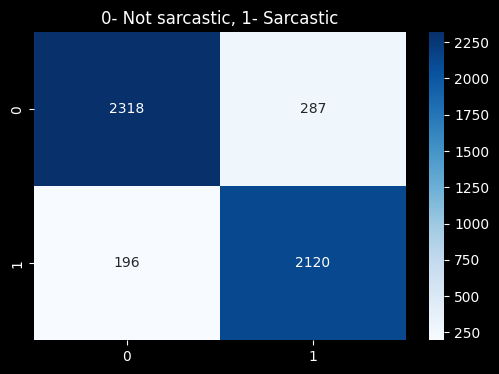

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("0- Not sarcastic, 1- Sarcastic")
plt.show()

In [ ]:
#We then fine tune on a SVC

cl = svm.SVC(kernel='linear', probability=True, gamma=0.125)
cl.fit(X_train, y_train)

sc = cl.score(X_test, y_test)
print('Kết quả train model, độ chính xác = ', sc*100, '%')

Kết quả train model, độ chính xác =  90.28652712863239 %


In [ ]:
y_pred = cl.predict(X_test)

In [ ]:
y_pred

array([0., 1., 1., ..., 0., 1., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(y_pred,y_test)

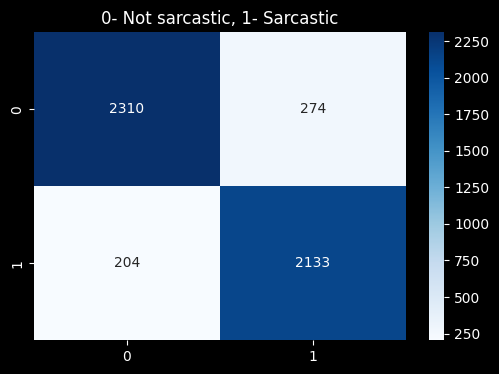

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("0- Not sarcastic, 1- Sarcastic")
plt.show()

# **Conclusion**

- As we can see the results above of 2 classifiers. The difference between them is quite small to take into consideration.
- They did well on testing set. Maybe the reason is that PhoBERT did good enough in word embedding step.